# Vojni filmi, posneti po knjigah


Medtem ko je moj brat velik navdušenec nad zgodovinskimi filmi, jaz raje berem knjige. Pred kratkim sva se pogovarjala o tem, kateri od obeh medijev je pri podajanju zgodovinske tematike boljši in tako sem se odločila, da v svoji projektni nalogi združim najini zanimanji in analiziram zgodovinske vojne filme, posnete po knjižnih predlogah.

Za analizo sem uporabila podatke iz seznama zgodovinskih filmov o vojnah med letoma 1945 in 2000, posnetih po knjigah. Seznam  sem našla na [Wikipediji](https://en.wikipedia.org/wiki/List_of_book-based_war_films_(1945%E2%80%932000_wars)). 


#### Hipoteze

Pred analizo sem si postavila več vprašanj, na katere bom s pomočjo nadaljnje obdelave podatkov poskušala odgovoriti:
* Katera vrsta besedila je njabolj primerna za predelavo v film?
* Katera država je posnela največ vojnih filmov?
* V katerem obdobju so posneli največ vojnih filmov po knjižni predlogi?
* Koliko let mine od izida knjige do izida filmske predelave?



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_rows = 15


filmi1 = pd.read_csv("filmi_po_knjigah.csv", index_col='id')
drzave1 = pd.read_csv("drzave.csv", index_col='film_id')
avtorji1 = pd.read_csv("avtorji_knjig.csv", index_col='film_id')
reziserji1 = pd.read_csv("reziserji.csv", index_col='film_id')
zvrsti1 = pd.read_csv("zvrsti_knjige.csv", index_col='film_id')

## Uvodna opomba

Med analiziranjem podatkov sem ugotovila, da nekateri podatki niso bili ustrezni za mojo nalogo. Nekatere knjige, po katerih so bili filmi posneti, so namreč izšle pred letom 1945. Te knjige najverjetneje ne opisujejo dejanskih vojn med letoma 1945 in 2000, razen če gre seveda za domišljijsko opisovanje možnih dogodkov v prihodnosti. Vseeno sem se za nadaljno analizo odločila, da filme, posnete po teh knjigah, izločim.

In [4]:
pd.options.display.float_format = '{:.0f}'.format
napacni_filmi = filmi1[filmi1.leto_izida_knjige < 1945]
napacni_filmi

,film,leto_filma,knjiga,leto_izida_knjige
id,,,,
29,I Was a Communist for the FBI,1951,Saturday Evening Post,1940
51,The 39 Steps,1959,The Thirty-Nine Steps,1915
58,Scarface,1983,Scarface,1930
109,Fixed Bayonets!,1951,Immortal Sergeant,1940
129,The Gun Runners,1958,To Have and Have Not,1937
132,Che Guevara,2008,Don Quixote,1615
138,Wild Reeds,1994,The Oak and the Reed,1668
146,The Deer Hunter,1978,Three Comrades,1937
148,Apocalypse Now,1979,Inspired by,1902


In [5]:
seznam_napacnih_filmov = list(napacni_filmi.index.values)
filmi = filmi1.drop(seznam_napacnih_filmov)
drzave = drzave1.drop(seznam_napacnih_filmov)
avtorji = avtorji1.drop(seznam_napacnih_filmov)
reziserji = reziserji1.drop(seznam_napacnih_filmov)
zvrsti = zvrsti1.drop(seznam_napacnih_filmov)

## Vrste besedila

Najprej me je zanimalo, katere vrste besedil so bile predelane v filme. Ali je kakšna vrsta še posebej primerna?
V spodnjem grafu lahko vidimo, katere vrste besedil se sploh pojavljajo, katere so najpogosteje in katere najredkeje uporabljene.

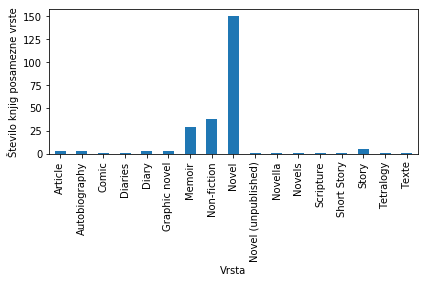

In [173]:
po_vrstah = zvrsti.groupby('zvrst')
graf = po_vrstah.size().plot.bar()
graf.set_ylabel("Število knjig posamezne vrste")
graf.set_xlabel("Vrsta")
plt.tight_layout()

### Ugotovitve:


1. Od skupno 258 filmov jih je bilo največ, 150, posnetih po <strong>romanih</strong> ('novel'). 

Romani so že sami po sebi zelo razširjena vrsta, ki jo avtorji uporabljajo za zapisovanje različnih tem, vse od domišljijskih pustolovščin pa do ljubezenskih zgodb. Roman je dovolj obsežen, da lahko zajame celotno dogajanje neke vojne zgodbe, ki ga velikokrat spremlja veliko podatkov in dejstev. Prav zato pa je zelo primeren tudi za predelavo v filmsko obliko, ker poda obširno zgodbo skupaj z opisi junakov, krajev in dogodkov, kar režiserjem in scenaristom močno olajša  delo.

In [174]:
po_vrstah.size().max()

150

2. Precej vrst je redko uporabljenih kot osnova za film. Med njimi so strip, dnevnik, kratke zgodbe in novele.

Vzrok je lahko v tem, da v obdobju med letoma 1945 in 2000 nekaterih vrst besedila sploh niso zapisovali, spet druge vrste so bile neprimerne za predelavo zaradi prekratke vsebine.

In [175]:
po_vrstah.size().min()

1

3. <b>Delež posameznih vrst knjig</b> za vsako državo posebej

Avtobiografije so predvsem osebne izpovedi avtorjev, zato bralce še posebej privlačijo. Tudi filmarji verjetno želijo izkoristiti uspeh znanih avtobiografij, zato je veliko filmov posnetih tudi po teh. Največ takih filmov je bilo posnetih v ZDA, blizu pa jim je tudi Združeno kraljestvo. 

Boljši pokazatelj popularnosti avtobiografij v posameznih državah pa je kar <em>delež</em> filmov, posnetih po teh. Podatki pokažejo, da je kar 50 % filmov posnetih po avtobiografijah v Argentini in Španiji, medtem ko imata ZDA in Združeno kraljestvo v resnici zelo majhen delež le-teh.

In [208]:
avtobiografije = zvrsti[zvrsti.zvrst == 'Memoir']
seznam_avtobiografij = list(avtobiografije.index.values)
drzave_z_avtobio = drzave.loc[seznam_avtobiografij].groupby('drzave').size()
drzave_z_avtobio

drzave
Argentina        3
Canada           3
France           2
Germany          1
Ireland          1
Spain            1
UK               9
US              18
West Germany     1
dtype: int64

In [228]:
delez_avtobiografij = (drzave_z_avtobio / drzave.groupby('drzave').size().loc[list(drzave_z_avtobio.index.values)] * 100).round(2)
delez_avtobiografij

drzave
Argentina       50.00
Canada          16.67
France          11.11
Germany         20.00
Ireland         25.00
Spain           50.00
UK              14.06
US              13.53
West Germany    33.33
dtype: float64

Ugotovitve v povezavi z deležem filmov, posnetih po avtobiografijah, so se mi zdele še posebej zanimive, zato sem želela na enem mestu zbrati podatke za vse vrste knjig. V spodnji tabeli so v procentih zapisani deleži posameznih vrst knjig, po katerih so posamezne države posnele filme.

In [363]:
# Tabela, v kateri so združene države in vrste knjig, po katerih so bili posneti filmi:
tabela = pd.merge(drzave, zvrsti, left_on = 'film_id', right_on = 'film_id')
# Tabela s številom filmov, ki jih je posnela posamezna država: 
skupno_stevilo_filmov = drzave.groupby('drzave').size()

# Slovar, ki vsaki državi priredi podslovar, v katerem so ključi vrste knjig, vrednosti pa deleži knjig posamezne vrste:

slovar_drzav = {}

for drzava2 in list(drzave.groupby('drzave').size().index.values):
    # koliko filmov je bilo posnetih v 'drzava2':
    filmi_v_drzavi2 = skupno_stevilo_filmov.loc[drzava2]
    # Tabela, v kateri so naštete vrste knjig in njihovo število za 'drzava2':
    j = (tabela[tabela.drzave == drzava2]).groupby('zvrst').size()
    slovar_delezev_vrst = {}
    
    # Podslovar z vrstami in deležem knjig posamezne vrste:
    for vrsta2 in list(j.index.values):
        slovar_delezev_vrst[vrsta2] = j.loc[vrsta2] / filmi_v_drzavi2
        
    slovar_drzav[drzava2] = slovar_delezev_vrst


In [393]:
pd.options.display.float_format = '{:,.2f}'.format
s  = pd.DataFrame(slovar_drzav)
s = s * 100
s = s.round(2).replace(np.NaN, 0.0)
s['Skupaj'] = 100.00
s

,Argentina,Australia,Bangladesh,Belgium,Bosnia,Canada,China,Croatia,Cuba,Denmark,...,South Korea,Spain,Sweden,Switzerland,UK,UK and US,US,USSR,West Germany,Skupaj
Memoir,50.00,0.00,0.00,0.00,0.00,16.67,0.00,0.00,0.00,0.00,...,0.00,50.00,0.00,0.00,14.06,0.00,13.53,0.00,33.33,100.00
Non-fiction,33.33,25.00,0.00,33.33,0.00,33.33,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,12.50,0.00,17.29,0.00,0.00,100.00
Novel,16.67,50.00,100.00,66.67,0.00,38.89,100.00,0.00,100.00,100.00,...,75.00,50.00,100.00,0.00,67.19,100.00,60.15,100.00,66.67,100.00
Autobiography,0.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.75,0.00,0.00,100.00
Article,0.00,0.00,0.00,0.00,100.00,5.56,0.00,100.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.56,0.00,2.26,0.00,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Novella,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.56,0.00,0.00,0.00,0.00,100.00
Tetralogy,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.56,0.00,0.00,0.00,0.00,100.00
Comic,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.75,0.00,0.00,100.00
Diary,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2.26,0.00,0.00,100.00


Tako npr. lahko ugotovim, v katerih državah so najbolj priljubljene priredbe romanov. Pri tem sem zanemarila države s 100 %, ker so to države, ki so posnele le en film, zato rezultat ni najbolj nazoren. Zanimiv pa je podatek, da so dobljene države razpršene po celem svetu: tako so med njimi evropske države in ZDA, pa tudi azijske države in celo Egipt.

In [407]:
(s.loc['Novel'])[(s.loc['Novel'] < 100) & (s.loc['Novel'] > 50)]

Belgium        66.67
Egypt          66.67
India          83.33
South Korea    75.00
UK             67.19
US             60.15
West Germany   66.67
Name: Novel, dtype: float64

## Katera država je posnela največ vojnih filmov?

Ali obstaja povezava med tem, kje so vojne potekale in kdo je posnel film? So filmi posneti po knjigah avtorjev iz iste države?

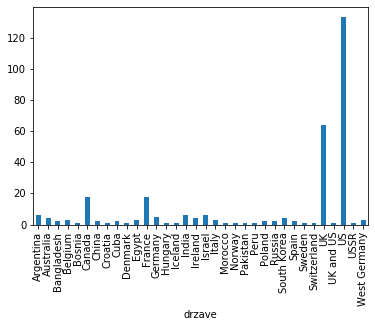

In [176]:
po_drzavah = drzave.groupby('drzave')
graf = po_drzavah.size().plot.bar()

In [177]:
koliko_filmov_v_drzavi = po_drzavah.size()
najvec = koliko_filmov_v_drzavi.max()
najmanj = koliko_filmov_v_drzavi.min()

In [178]:
koliko_filmov_v_drzavi[koliko_filmov_v_drzavi == najvec]

drzave
US    133
dtype: int64

In [179]:
koliko_filmov_v_drzavi[koliko_filmov_v_drzavi >= 10]

drzave
Canada     18
France     18
UK         64
US        133
dtype: int64

### Ugotovitve:


1. Največ filmov so posnele ZDA, kar 133. Med državami z več kot 10 vojnimi filmi so še Kanada, Francija in Združeno Kraljestvo.

## V katerem obdobju so posneli največ vojnih filmov po knjižni predlogi?




In [8]:
filmi['desetletje_filma'] = 10 * (filmi.leto_filma // 10)
filmi['desetletje_knjige'] = 10 * (filmi.leto_izida_knjige // 10)

In [11]:
filmi_po_desetletjih = filmi.groupby('desetletje_filma')
knjige_po_desetletjih = filmi.groupby('desetletje_knjige')

Število filmov v posameznem desetletju:

In [17]:
filmi_po_desetletjih.size()

desetletje_filma
1940     3
1950    26
1960    35
1970    24
1980    49
1990    38
2000    64
2010     4
dtype: int64

Število knjig, napisanih v posameznem desetletju:

In [18]:
knjige_po_desetletjih.size()

desetletje_knjige
1940     7
1950    39
1960    40
1970    45
1980    46
1990    39
2000    25
dtype: int64

### Ugotovitve

1. Koliko filmov je bilo posnetih v istem desetletju kot so bile napisane njihove knjižne predloge? 

Predvidevala sem, da je veliko filmov nastalo kmalu po izidu knjige. Če se knjiga izkaže za uspešnico, filmarji namreč radi izkoristijo to navdušenje za promocijo svojega filma in s tem poskrbijo za večji zaslužek.
Najmanj je takih filmov bilo v 40-ih letih. Knjige o drugi svetovni vojni so takrat seveda šele začele nastajati, mnogo spominov in avtobiografij še ni bilo napisanih. Že v 50-ih in 60-ih pa je filmskih priredb veliko več. 

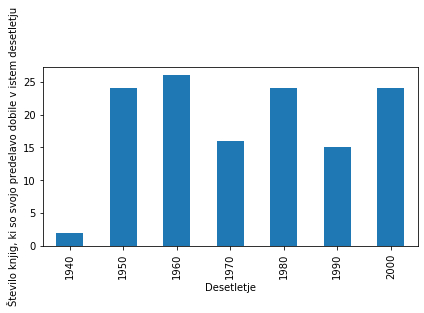

In [54]:
graf3 = filmi[filmi.desetletje_knjige == filmi.desetletje_filma].groupby('desetletje_filma').size().plot.bar()
graf3.set_xlabel("Desetletje")
graf3.set_ylabel("Število knjig, ki so svojo predelavo dobile v istem desetletju")
plt.tight_layout()

2. Največji odstotek knjig, po katerih je bil film posnet že v istem desetletju, pripada letom od 2000 do 2010.

Kar 96 % vseh knjig, ki so izšle v teh 10 letih, je svojo priredbo dobilo v istem desetletju. Če se navežem na zgornje razmišljanje, je to lahko rezultat marketinške taktike: knjižna uspešnica prinese večjo reklamo in potencialen večji zaslužek, kar v modernem svetu igra veliko vlogo. Lahko pa bi to bila tudi posledica bolj razvite filmske industrije in hitrejšega snemanja filmov. 

Sicer pa ni mogoče določiti trenda naraščanja ali padanja, čeprav je najmanjši odstotek res pripadel 40-im letom.

In [34]:
v_istem_desetletju = list(filmi[filmi.desetletje_knjige == filmi.desetletje_filma].groupby('desetletje_filma').size())
seznam_po_desetletjih = list(knjige_po_desetletjih.size())

odstotki_po_desetletjih = []
for i in range(len(seznam_po_desetletjih)):
    odstotki_po_desetletjih.append(round(v_istem_desetletju[i] / seznam_po_desetletjih[i], 4))
odstotki_po_desetletjih   

[0.2857, 0.6154, 0.65, 0.3556, 0.5217, 0.3846, 0.96]

## Ali filmske predelave obdržijo naslove knjig?

In [17]:
filmi[filmi.film != filmi.knjiga]

,film,leto_filma,knjiga,leto_izida_knjige
id,,,,
2,Yangtse Incident: The Story of H.M.S. Amethyst,1957,Yangtse Incident: The Story of H.M.S. Amethyst...,1950
5,Assembly,2007,Guan Si,1990
8,The 317th Platoon,1965,La 31 Section,1963
11,The Red Danube,1949,Vespers in Vienna,1947
12,Assignment – Paris!,1952,Trial of Terror,1950
...,...,...,...,...
248,Purgatory,1998,Psalm 137,nan
249,Proof of Life,2000,Adventures in the Ransom Trade,1990
254,The Enemy Within,1994,Seven Days in May,1962


### Ugotovitve

1. Kar 130 filmov, torej <b>več kot polovica,</b> ima drugačen naslov kot knjiga, po kateri je bil film posnet.

V nekaterih primerih gre le za skrajšanje zelo dolgega naslova knjige:

In [33]:
filmi.loc[2].knjiga

'Yangtse Incident: The Story of H.M.S. Amethyst, April 20, 1949, to July 31, 1949'

In [34]:
filmi.loc[2].film

'Yangtse Incident: The Story of H.M.S. Amethyst'

V drugih primerih gre za prevod naslova, v tretjih pa je naslov popolnoma spremenjen, morda zato, da bi bil film privlačnejši za gledalce, morda zato, ker se je režiser le oprl na vsebino knjige in je film bolj njegova lastna stvaritev kot priredba, morda pa je razlog kje drugje.

2. Zanimalo me je, <b>koliko let je preteklo med izidom knjige in filma</b> v primeru, ko sta se naslova razlikovala. 

Želela sem namreč ugotoviti, ali pretečena leta morda vplivajo na režiserjevo odločitev, da film preimenuje. Izkazalo se je, da je povprečen čas, ki mine med izidom filma in knjige z različnima naslovoma, res za skoraj 3 leta daljši, kot če imata knjiga in film enak naslov, a iz tega težko sklepam, da se režiserji prav zaradi pretečenega časa odločajo za drugačne naslove.

In [145]:
def koliko_let(sez1, sez2):
    # za sez1 vstavim seznam filmov, za sez2 pa seznam knjig
    seznam_razlik = []
    for i in range(len(sez1)):
        # ignoriram tiste knjige, ki nimajo podatka o letu izida
        if np.isnan(sez1[i]) or np.isnan(sez2[i]):
            pass
        else:
            razlika = sez1[i] - sez2[i]
            # upoštevam le filme, ki so posneti po izidu knjige
            if razlika >= 0:
                seznam_razlik.append(razlika)
            else:
                pass
    return sum(seznam_razlik) / len(seznam_razlik)

In [146]:
seznam_knjige = list(filmi[filmi.film != filmi.knjiga].leto_izida_knjige)
seznam_filmi = list(filmi[filmi.film != filmi.knjiga].leto_filma)
koliko_let(seznam_filmi, seznam_knjige)

9.76984126984127

In [147]:
seznam_knjige2 = list(filmi[filmi.film == filmi.knjiga].leto_izida_knjige)
seznam_filmi2 = list(filmi[filmi.film == filmi.knjiga].leto_filma)
koliko_let(seznam_filmi2, seznam_knjige2)

7.017857142857143

Morda pa je na spremembo naslovov vplivalo dejstvo, da so bili filmi posneti v novem tisočletju. Kar 29,23 % filmov z naslovi, ki se razlikujejo od knjige, je bilo posnetih po letu 2000.

In [86]:
seznam_filmi3 = list(filmi[(filmi.film != filmi.knjiga) & (filmi.leto_filma > 2000)].leto_filma)
seznam_filmi4 = list(filmi[filmi.film != filmi.knjiga].leto_filma)   
len(seznam_filmi3) / len(seznam_filmi4)

0.2923076923076923

Pri analizi teh podatkov sem ugotovila še, da so trije filmi očitno bili posneti po knjigah, ki so izšle za filmom. Morda gre za pomoto pri zapisu letnic (vse se res razlikujejo le za 1), a  Wikipediji ne gre zaupati.

In [74]:
filmi[((filmi.leto_filma - filmi.leto_izida_knjige) < 0)== True]

,film,leto_filma,knjiga,leto_izida_knjige
id,,,,
10,The Third Man,1949,The Third Man,1950
221,Resurrected,1989,Summer Soldier,1990
225,Waltz with Bashir,2008,Waltz with Bashir: A Lebanon War Story,2009


 3. V celoti spremenjenih naslovov je le 27.

Predvidevala sem, da je večina naslovov res le skrajšanih ali vsaj podobnih originalnemu. Od 130 obravnavanih filmov jih ima 27 v resnici popolnoma enak naslov kot izvirnik, morda brez kakšnega ločila ali s kakšno izpuščeno besedo, 74 pa se jih od knjižnega naslova popolnoma razlikuje.

In [160]:
def zanka(sez):
    # sprejme seznam besed, se čez njega zapelje in izbriše ločila iz vsake besede
    for i in range(len(sez)):
        if '.' in sez[i]:
            sez[i] = sez[i].replace('.', '')
        if ',' in sez[i]:
            sez[i] = sez[i].replace(',', '')
        if '!' in sez[i]:
            sez[i] = sez[i].replace('!', '')
        if '?' in sez[i]:
            sez[i] = sez[i].replace('?', '')       
        if ':' in sez[i]:
            sez[i] = sez[i].replace(':', '')
        if ';' in sez[i]:
            sez[i] = sez[i].replace(';', '')
    return sez

def odstotek_enakih_besed(film, knjiga):
    # sprejme naslov filma in knjige in vrne odstotek besed v naslovu filma, ki se pojavijo tudi v naslovu knjige
    besede_v_filmu = str(film).split()
    besede_v_knjigi = str(knjiga).split()
    okej_besede = []
    for i in zanka(besede_v_filmu):
        if i in zanka(besede_v_knjigi):
            okej_besede.append(i)
        else:
            pass
    return len(okej_besede) / len(besede_v_filmu)

filmi_za_odstotek = list(filmi[filmi.film != filmi.knjiga].film)
knjige_za_odstotek = list(filmi[filmi.film != filmi.knjiga].knjiga)

# zapeljem se čez seznam vseh naslovov knjig in za vsako izračunam, v kolikšni meri se naslov filma ujema z naslovom knjige
seznam_odstotkov_enakih_besed = []
for i in range(len(knjige_za_odstotek)):
    seznam_odstotkov_enakih_besed.append(odstotek_enakih_besed(filmi_za_odstotek[i], knjige_za_odstotek[i]))

Naslovi knjig in filmov, ki se razlikujejo, so si vseeno v veliko primerih podobni: v povprečju se ujemajo za 30,66%.

In [161]:
seznam_odstotkov_enakih_besed
(sum(seznam_odstotkov_enakih_besed)) / len(seznam_odstotkov_enakih_besed)

0.30660256410256403

Filmov, ki imajo naslov, ki je v celoti vsebovan tudi v naslovu knjige (torej je režiser naslov le skrajšal in/ali dodal oz. izbrisal kakšno ločilo), je 27

In [162]:
vse_besede_enake = 0
for i in seznam_odstotkov_enakih_besed:
    if i == 1:
        vse_besede_enake += 1
vse_besede_enake

27

Po drugi strani ima 74, torej več kot polovica obravnavanih 130 filmov, popolnoma spremenjen naslov.

In [163]:
vse_besede_spremenjene = 0
for i in seznam_odstotkov_enakih_besed:
    if i == 0:
        vse_besede_spremenjene += 1
vse_besede_spremenjene

74

## SKLEP

Če povzamem svoje ugotovitve, vidim, da je največ vojnih filmov posnetih po romanih, tem pa sledijo zgodbe, zapisane po resničnih dogodkih, in dnevniki. Romani so najbolj pogosta izbira za priredbo v film v Združenem Kraljestvu, Indiji in v Južni Koreji, medtem ko v Argentini in Španiji uživajo v biografijah.

Največ vojnih filmov so posnele države, ki imajo tudi največje proračune za snemanje, najbolj razvito opremo in najverjetneje tudi največje potencialno občinstvo za ogled filma v kinu: Združeno Kraljestvo, ZDA, Francija in Kanada.

V letih od 2000 do 2010 so bili filmi še posebej vojno obarvani. V tem obdobju je namreč bilo posnetih največ vojnih filmov. Hkrati pa je izšlo tudi največ knjig, ki so že kmalu za izidom dobile svojo filmsko različico.

Okoli polovica filmov ima drugačen naslov kot knjige, čeprav večinoma ne gre za velike spremembe (prevod naslova v angleščino, skrajšanje naslova). Med izidom knjige in filma, katerih naslova se razlikujeta, je preteklo v povprečju 9,77 let, medtem ko je število let pri tistih z enakima naslovoma v povprečju 7,02. Filmi, ki imajo drugačen naslov kot knjige, se z izvirnim naslovom v povprečju vseeno ujemajo za 30 %.

S to projektno nalogo sem torej prišla do mnogih zanimivih ugotovitev, vseeno pa nisem odgovorila na vprašanje, ki sva si ga postavila z bratom.To, ali so pri orisovanju zgodovinskih dogodkov boljše knjige ali filmi, bom prepustila najini subjektivni presoji.

In še ena opazka: v bodoče se je dobro izogibati podatkom z Wikipedije, ker so precej nezanesljivi, kar sem na večih mestih ugotovila in omenila tudi skozi svojo projektno nalogo.